In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install numpy scipy matplotlib

Requirement already up-to-date: pip in /srv/conda/lib/python3.6/site-packages (10.0.1)


In [2]:
import math

import numpy as np
import scipy
import matplotlib.pyplot as plt

def triangle(x):
    return 2.0 / np.pi * (np.absolute((x % (2.0 * np.pi)) - np.pi) - np.pi / 2.0)

fₛ = 44100.0 # Hz
Tₛ = 1.0 / fₛ
f = 45.5 # Hz
N = 2**16

t = np.arange(0.0, float(N)) * Tₛ
x = triangle(2.0 * np.pi * f * t)
w = np.random.normal(scale=0.8, size=N) # noise signal
x_hat = np.hanning(N) * (x + w) # windowed signal with additive gaussian noise
X = np.fft.rfft(x_hat) / N

X[1:-1] = 2.0 * X[1:-1]
ω = np.arange(np.size(X)) / (float(N) / fₛ) * 2.0 * np.pi
f = ω / (2.0 * np.pi)

k = 5
M = math.floor(N / 2 / k)
Y = np.ones(M, dtype=np.complex64)

for i in range(1, k):
    for j in range(M):
        Y[j] *= X[i * j]

ω_max = ω[np.argmax(np.abs(Y))]

print("sample length: {} s".format(t[-1]))
print("f_max = {} Hz".format(ω_max / (2.0 * np.pi)))
print("SNR = {} dB".format(10.0 * np.log10(np.sum(np.square(x)) / np.sum(np.square(w)))))

sample length: 1.4860544217687075 s
f_max = 45.758056640625 Hz
SNR = -2.8268962144169825 dB


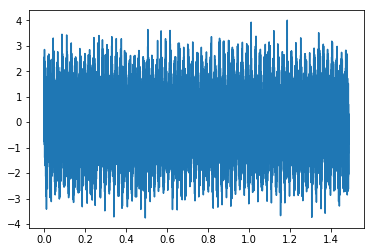

In [3]:
plt.plot(t, x + w)

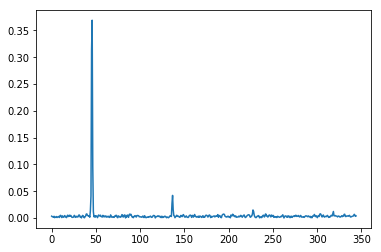

In [4]:
plt.plot(f[:2**9], np.abs(X[:2**9]))

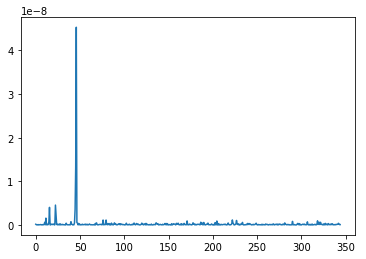

In [5]:
plt.plot(f[:2**9], np.abs(Y[:2**9]))